# <Center> Wine Quality Prediction -  Supervised Learning 


<html>
    <b>Problem Statement: </b>
The dataset contains red and white variants of the Portuguese "Vinho Verde" wine.For more details, consult:
    <a>  http://www.vinhoverde.pt/en/ </a>
    
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The goal is to predict the quality score of wine (between 0 to 10 range) as low, medium or high

<b>Data Description:</b>
<p>There are 13 variables with 6497 records:</p>
<p>Attribute Information: The data set includes information about:</p>
<p>Input variables (based on physicochemical tests):</p>
   <p><li>1 - fixed acidity</li>
  <li> 2 - volatile acidity</li>
   <li>3 - citric acid</li>
   <li>4 - residual sugar</li>
   <li>5 - chlorides</li>
   <li>6 - free sulfur dioxide</li>
   <li>7 - total sulfur dioxide</li>
   <li>8 - density</li>
   <li>9 - pH</li>
   <li>10 - sulphates</li>
   <li>11 – alcohol</li>
   <li>12- Wine_Type (red or wine)</li> </p>
   <p>Output variable (based on sensory data): </p>
   <li>13 - quality (score between 0 and 10)</li>
</html>

**--> Importing the required libraries & loading the data into dataframe**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
wine= pd.read_csv('wine_quality.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [124]:
#checking for missing values
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [125]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [126]:
#statistical informaion of all the variables
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [127]:
# Extracting the target variable (quality) and creating a list of dependant variables
target = pd.Series(wine['quality'])
variable_list = list(wine.columns)
variable_list.remove('quality')
print(variable_list)
target.value_counts()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type']


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [128]:
target.unique()

array([5, 6, 7, 4, 8, 3, 9])

**--> Exploratory data analysis**

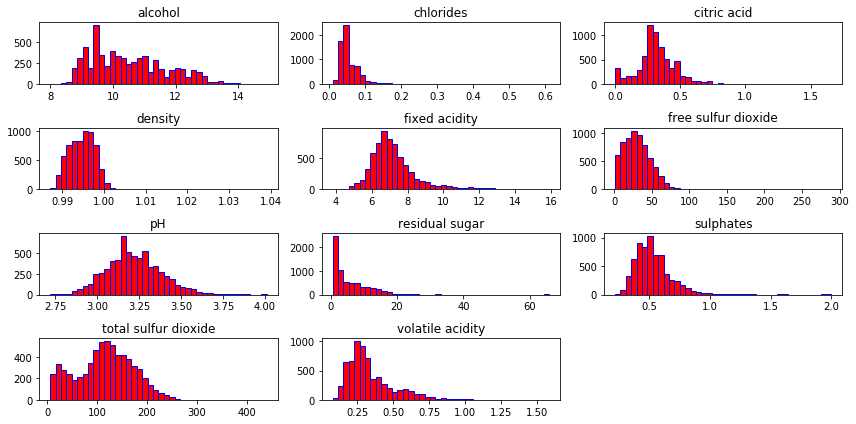

In [129]:
#Performing the univariate analysis on all the dependant variables 
wine[variable_list].hist(bins=40, edgecolor='b',grid=False,
                          figsize=(12,6), color='red')
plt.tight_layout()  

It can be seen from the univariate analysis that dependant variables such as acidity and sulphates are right skewed. 

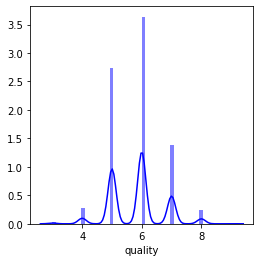

In [130]:
plt.figure(figsize=(4, 4))
sns.distplot(target,color ='b', bins=50, hist_kws={'alpha': 0.5})

We can notice that some features, like 'acidity' or 'sulphates' for example, have a right skewed distribution and should, in a real context, probably be engineered into their log forms for better results.

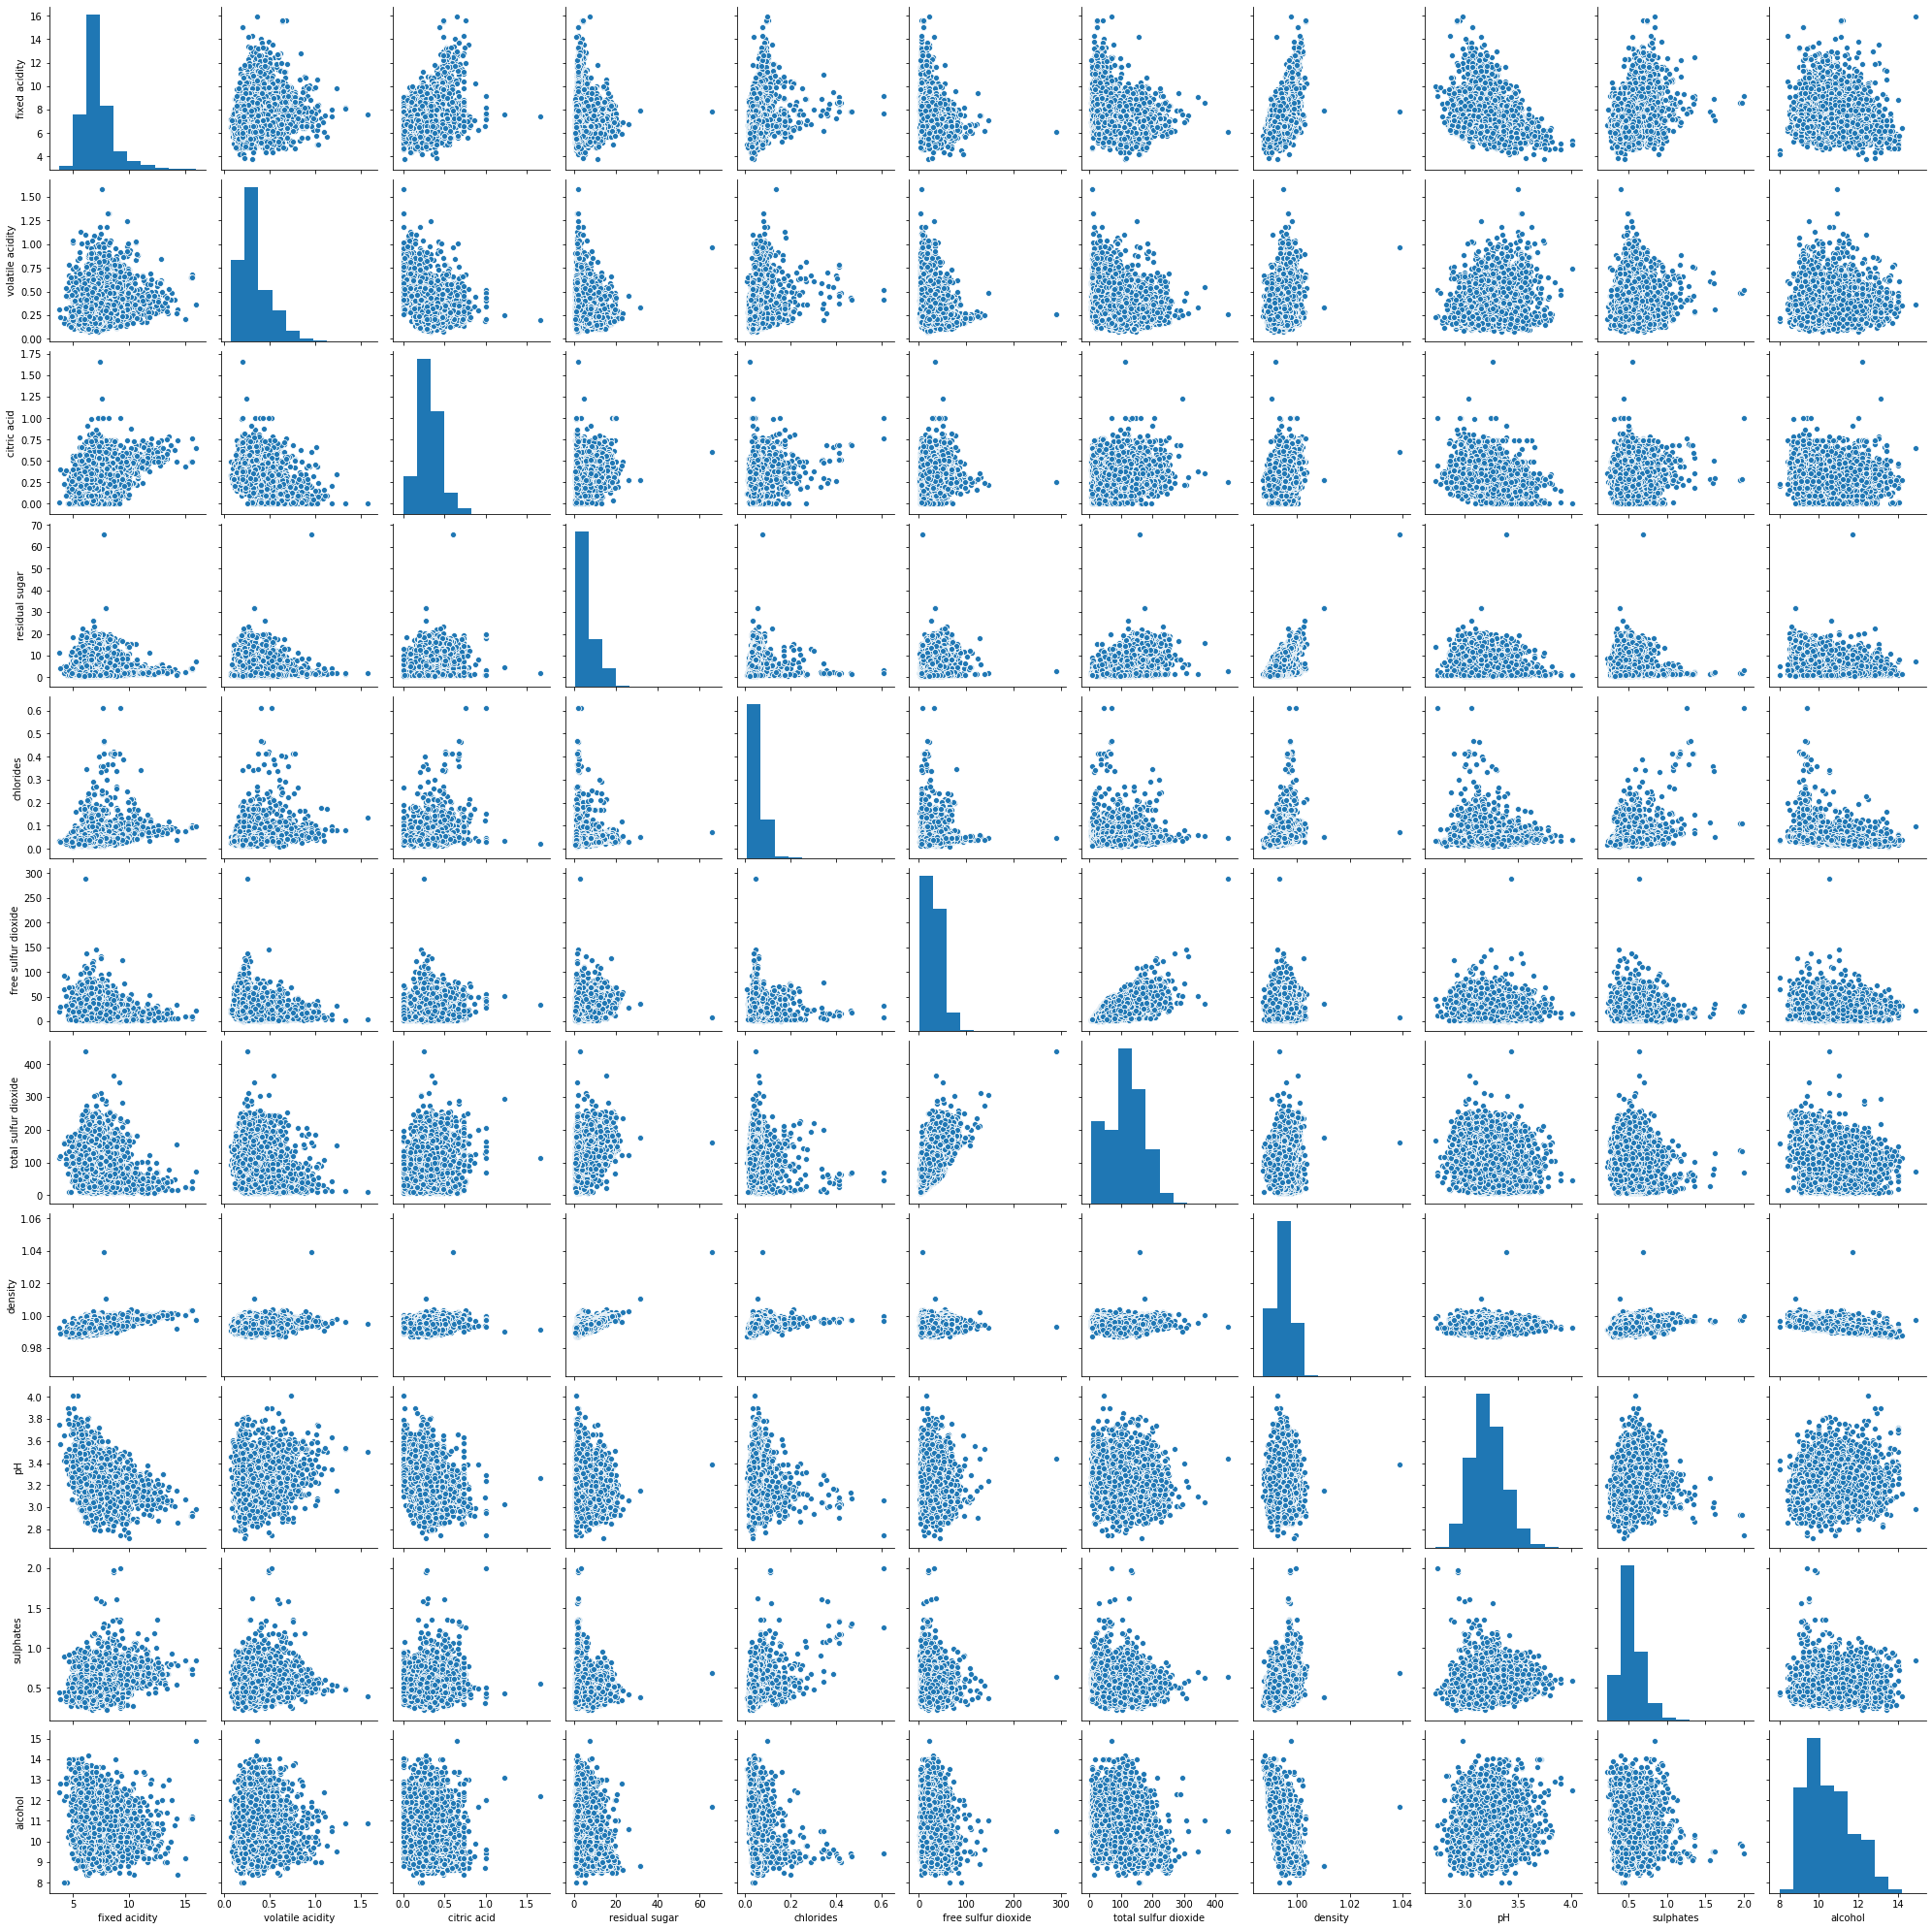

In [131]:
#Performing Multivariate  analysis on the dataset
sns.pairplot(wine[variable_list])

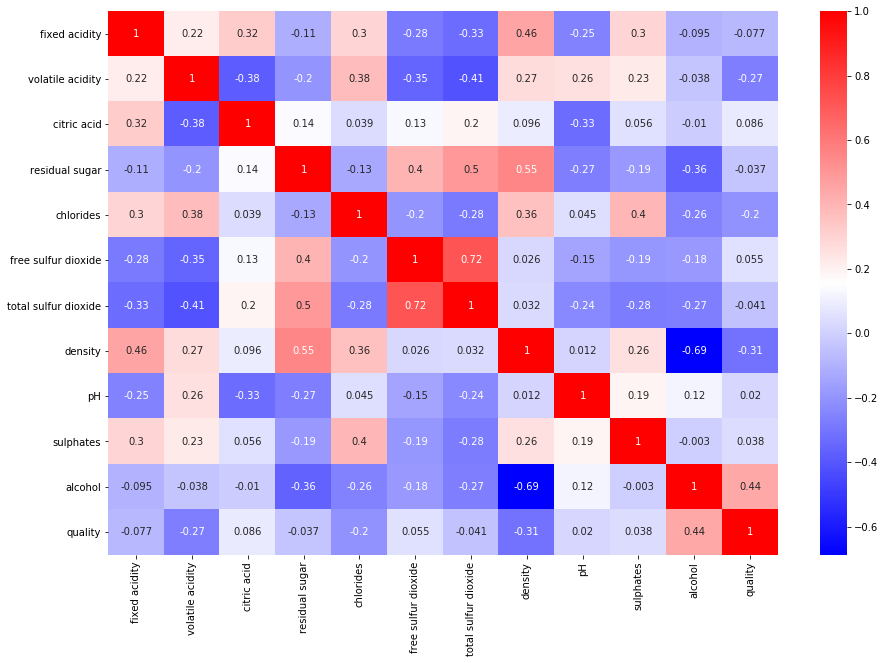

In [132]:
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(),annot=True,cmap="bwr")

--From the heat map, we can see that the alcohol level has the strongest postive correlation (0.44) with the quality.


**--> Feature engineering**

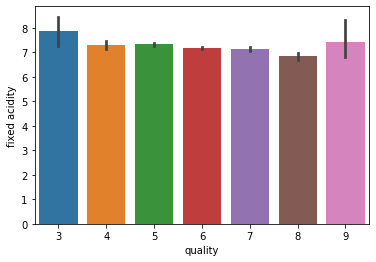

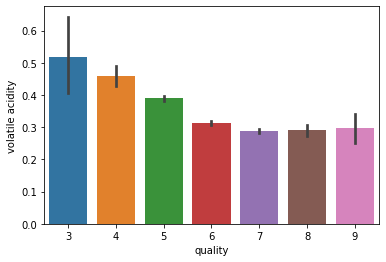

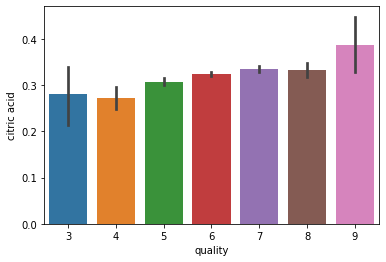

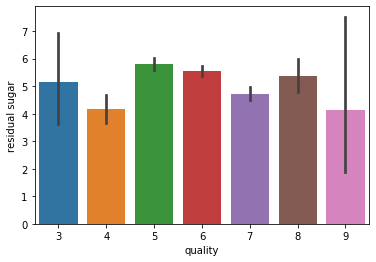

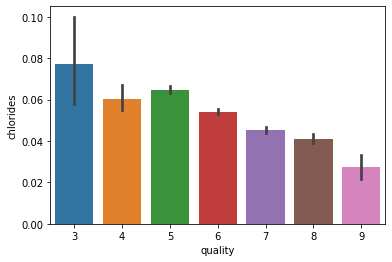

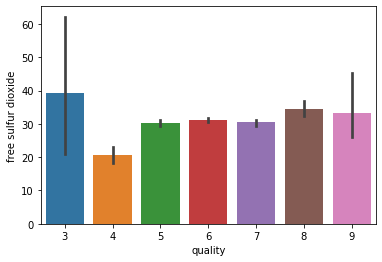

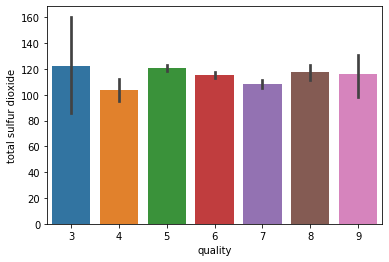

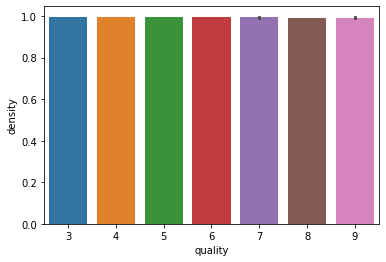

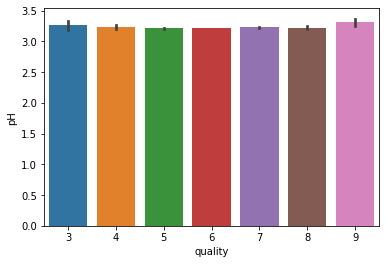

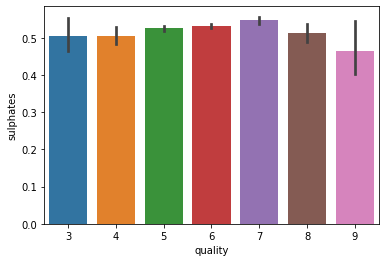

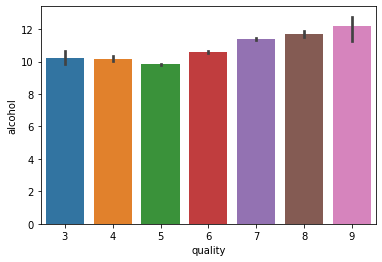

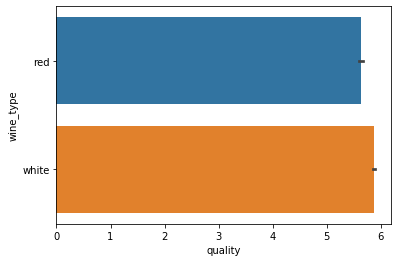

In [133]:
for i in wine[variable_list]:
    if i == "quality":
        break
    sns.barplot("quality",i,data=wine)
    plt.show()

In [134]:
bins = [0, 6.5, 10]
labels = ["Meh","Good"]
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=labels)

*Separating the quality of wine into three categories. If the wine quality is
 <li>   0-6.5 : Meh
  <li>  6.5:10 : Good*
 

In [135]:
wine['quality'].value_counts()

Meh     5220
Good    1277
Name: quality, dtype: int64

In [136]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label_encoder= LabelEncoder()
wine['quality'] = label_encoder.fit_transform(wine['quality'])

In [137]:
wine = wine.drop('wine_type', axis = 1)

In [138]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


**--> ML algorithms**

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [140]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [141]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=44)


In [142]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (5197, 11)
Shape of X_test:  (1300, 11)
Shape of y_train:  (5197,)
Shape of y_test (1300,)


### Model 1: Logistic Regression

In [143]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [144]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(solver='liblinear',max_iter=10000, random_state=44)
logistic_reg.fit(x_train_scaled, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=44, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
# Predicting Cross Validation Score
crossval_logistic = cross_val_score(estimator = logistic_reg, X = x_train_scaled, y = y_train.ravel())
print("CV: ", crossval_logistic.mean())

y_pred_logistic_test = logistic_reg.predict(x_test_scaled)
accuracy_logistic_test = accuracy_score(y_test, y_pred_logistic_test)
print("Logistic Regression accuracy: ", accuracy_logistic_test)

CV:  0.8179682757088917
Logistic Regression accuracy:  0.8153846153846154


In [146]:
confusion_matrix(y_test, y_pred_logistic_test)

array([[  57,  191],
       [  49, 1003]])

In [147]:
df_logistic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_logistic_test})
df_logistic.head(10)

,Actual,Predicted
2183,0,1
3643,1,1
2211,1,1
5825,0,1
2792,0,1
4037,1,1
1589,1,1
2786,0,1
2594,1,1
1097,1,1


### K-Nearest Neighbors (KNN)

In [148]:
neighbors = np.arange(5, 40) 
knn_train_accuracy = np.empty(len(neighbors)) 
knn_test_accuracy = np.empty(len(neighbors))

In [149]:
# Loop over K values 
for i,k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(x_train_scaled, y_train)
    # Compute test data accuracy 
    knn_test_accuracy[i] = knn.score(x_test_scaled, y_test)

In [150]:
knn_test_accuracy

array([0.85153846, 0.83307692, 0.84230769, 0.83153846, 0.84769231,
       0.83615385, 0.83461538, 0.83384615, 0.84153846, 0.84307692,
       0.84461538, 0.83846154, 0.84384615, 0.84307692, 0.84615385,
       0.84769231, 0.85230769, 0.85307692, 0.84923077, 0.84769231,
       0.84384615, 0.83923077, 0.83846154, 0.83923077, 0.84384615,
       0.84461538, 0.84615385, 0.84769231, 0.84384615, 0.84923077,
       0.85307692, 0.84769231, 0.84923077, 0.84769231, 0.84846154])

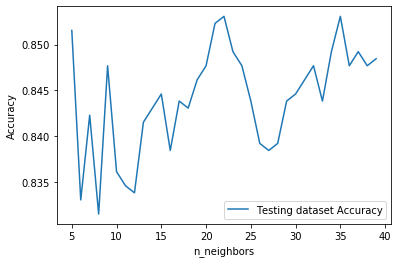

In [151]:
# Generate plot 
plt.plot(neighbors, knn_test_accuracy, label = 'Testing dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

*Considering n_neighbors =21 to attain max accuracy*

In [154]:
knn_classifier = KNeighborsClassifier(leaf_size = 10, n_neighbors = 21, weights = 'distance')
knn_classifier.fit(x_train_scaled, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='distance')

In [155]:
# Predicting Cross Validation Score
crossval_knn = cross_val_score(estimator = knn_classifier, X = x_train_scaled, y = y_train.ravel())
print("CV: ", crossval_knn.mean())

y_pred_knn_test = knn_classifier.predict(x_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Knn Accuracy: ", accuracy_knn_test)

CV:  0.8680001110535278
Knn Accuracy:  0.8892307692307693


In [156]:
confusion_matrix(y_test, y_pred_knn_test)


array([[ 151,   97],
       [  47, 1005]])

In [157]:
df_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn_test})
df_knn.tail(10)

,Actual,Predicted
2725,0,1
5083,0,0
1860,1,1
5351,1,1
5409,1,1
5790,1,1
2962,1,1
4410,1,1
6037,1,1
5169,1,1


### Support Vector Machines (SVM)

In [158]:
svm_classifier = SVC()
svm_classifier.fit(x_train_scaled, y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [159]:
# Predicting Cross Validation Score
crossval_svm = cross_val_score(estimator = svm_classifier, X = x_train_scaled, y = y_train.ravel())
print("CV: ", crossval_svm.mean())

y_pred_svm_test = svm_classifier.predict(x_test_scaled)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("SVM Accuracy: ", accuracy_svm_test)

CV:  0.8297071888650329
SVM Accuracy:  0.8438461538461538


In [160]:
confusion_matrix(y_test, y_pred_svm_test)


array([[  72,  176],
       [  27, 1025]])

### Naive Bayes

In [161]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_scaled, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [162]:
# Predicting Cross Validation Score
crossval_nb = cross_val_score(estimator = nb_classifier, X = x_train_scaled, y = y_train.ravel())
print("CV: ", crossval_nb.mean())

y_pred_nb_test = nb_classifier.predict(x_test_scaled)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Naive Bayes Accuracy: ", accuracy_nb_test)

CV:  0.7431163470792923
Naive Bayes Accuracy:  0.7546153846153846


### Random Forest Classification

In [163]:
rfc = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 1000, random_state=44)
rf_classifier = rfc.fit(x_train_scaled, y_train.ravel())
y_pred_rfc_test = rf_classifier.predict(x_test_scaled)


In [164]:
# Predicting Cross Validation Score
crossval_rfc = cross_val_score(estimator = rf_classifier, X = x_train_scaled, y = y_train.ravel())
print("CV: ", crossval_rfc.mean())

accuracy_rfc_test = accuracy_score(y_test, y_pred_rfc_test)
print("Random Forest Accuracy: ", accuracy_rfc_test)

CV:  0.8774315169911897
Random Forest Accuracy:  0.8992307692307693


### Decision Trees

In [165]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 44)
dt_classifier = dt.fit(x_train_scaled, y_train.ravel())
y_pred_dt_test = dt_classifier.predict(x_test_scaled)


In [166]:
# Predicting Cross Validation Score
crossval_dt = cross_val_score(estimator = dt_classifier, X = x_train_scaled, y = y_train.ravel())
print("CV: ", crossval_dt.mean())

accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Decision Trees Accuracy: ", accuracy_dt_test)

CV:  0.8256722440216183
Decision Trees Accuracy:  0.833076923076923


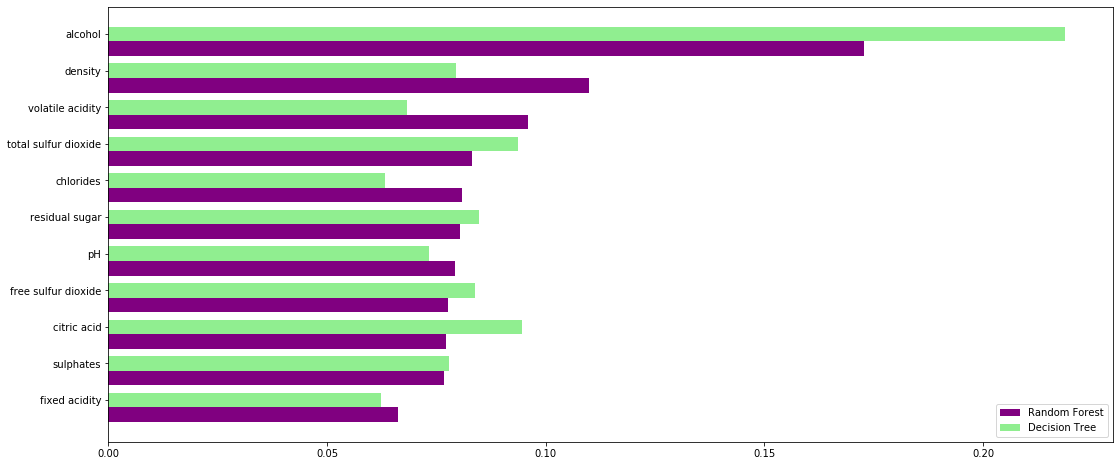

In [167]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt':dt.feature_importances_},index=x_train.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

### Comparing all the models

In [172]:
models = [('Logistic Regression',accuracy_logistic_test, crossval_logistic.mean()),
          ('KNN', accuracy_knn_test, crossval_knn.mean()),
          ('SVM', accuracy_svm_test, crossval_svm.mean()),
          ('Naive Bayes',accuracy_nb_test, crossval_nb.mean()),
          ('Decision Tree',accuracy_dt_test, crossval_dt.mean()),
          ('Random Forest',accuracy_rfc_test, crossval_rfc.mean())
         ]

In [182]:
Best_Model = pd.DataFrame(data = models, columns=['Model','Accuracy','Cross-Validation'])
Best_Model.sort_values(by='Accuracy',ascending=False,inplace=True)
Best_Model.reset_index(inplace=True, drop= True)

In [183]:
Best_Model

,Model,Accuracy,Cross-Validation
0,Random Forest,0.899231,0.877432
1,KNN,0.889231,0.868000
2,SVM,0.843846,0.829707
3,Decision Tree,0.833077,0.825672
4,Logistic Regression,0.815385,0.817968
5,Naive Bayes,0.754615,0.743116
